In [1]:
using MIDI
using MusicVisualizations, PyPlot, MusicManipulations


In [2]:
# Write a C scale to MIDI
# MIDI.ms_per_tick(100, 10)
C = Note(name_to_pitch("C4"), 100, 0, 1000)
D = Note(name_to_pitch("D4"), 100, 1000, 1000)
E = Note(name_to_pitch("E4"), 100, 2000, 1000)
F = Note(name_to_pitch("F4"), 100, 3000, 1000)
G = Note(name_to_pitch("G4"), 100, 4000, 1000)
A = Note(name_to_pitch("A4"), 100, 5000, 1000)
B = Note(name_to_pitch("B4"), 100, 6000, 1000)
C5 = Note(name_to_pitch("C5"), 100, 7000, 1000)
C_repeat = Note(name_to_pitch("C4"), 100, 8000, 1000)

file = MIDIFile()
track = MIDITrack()
notes = Notes()

function bpm_to_microseconds(bpm)
    return round(Int, 60000000/bpm)
end

push!(track.events, MIDI.SetTempoEvent(0, bpm_to_microseconds(110))) # dT, metatype
push!(track.events, MIDI.TimeSignatureEvent(0, 4, 4, 24, 8))

println(track.events)

# add notes to the track
push!(notes, C)
push!(notes, D)
push!(notes, E)
push!(notes, F)
push!(notes, G)
push!(notes, A)
push!(notes, B)
push!(notes, C5)
push!(notes, C_repeat)


addnotes!(track,notes)
println(track.events)


addtrackname!(track, "Piano")
push!(file.tracks, track)
save("C_scale.mid", file)


TrackEvent[MIDI.SetTempoEvent(0, 0x51, 545455), MIDI.TimeSignatureEvent(0, 0x58, 4, 4, 24, 8)]
TrackEvent[MIDI.SetTempoEvent(0, 0x51, 545455), MIDI.TimeSignatureEvent(0, 0x58, 4, 4, 24, 8), MIDI.NoteOnEvent(0, 0x90, 60, 100), MIDI.NoteOffEvent(1000, 0x80, 60, 100), MIDI.NoteOnEvent(0, 0x90, 62, 100), MIDI.NoteOffEvent(1000, 0x80, 62, 100), MIDI.NoteOnEvent(0, 0x90, 64, 100), MIDI.NoteOffEvent(1000, 0x80, 64, 100), MIDI.NoteOnEvent(0, 0x90, 65, 100), MIDI.NoteOffEvent(1000, 0x80, 65, 100), MIDI.NoteOnEvent(0, 0x90, 67, 100), MIDI.NoteOffEvent(1000, 0x80, 67, 100), MIDI.NoteOnEvent(0, 0x90, 69, 100), MIDI.NoteOffEvent(1000, 0x80, 69, 100), MIDI.NoteOnEvent(0, 0x90, 71, 100), MIDI.NoteOffEvent(1000, 0x80, 71, 100), MIDI.NoteOnEvent(0, 0x90, 72, 100), MIDI.NoteOffEvent(1000, 0x80, 72, 100), MIDI.NoteOnEvent(0, 0x90, 60, 100), MIDI.NoteOffEvent(1000, 0x80, 60, 100)]


MIDIFile (format=1, tpq=960) with tracks:
 Piano


In [3]:
# Read MIDI file
midi = load("C_scale.mid")
piano = midi.tracks[1]
notes = getnotes(piano, midi.tpq)

println("MIDI INFO")
@show midi.tpq
@show qpm(midi)
@show bpm(midi)
@show ms_per_tick(midi)

@show midi.tracks
@show notes

total_ticks = 9001

event_stack = []
M1 = [] # free
M2 = [] # falling key
M3 = [] # bottom out

unique_pitches = Set(pitch_to_name(note.pitch) for note in notes)

# mode_dict = Dict{String, Vector{Int}}()
mode_dict = Dict(pitch => zeros(total_ticks) for pitch in unique_pitches)


for note in notes
    # set the key to be in the key fall phase based on note velocity
    key_fall_duration = 1 + 

    mode_dict[]

    # Set the key to bottom out for the duration of the note
    mode_dict[pitch_to_name(note.pitch)][1 .+ collect(note.position : (note.position+note.duration))] .= 3 
end








MIDI INFO
midi.tpq = 960
qpm(midi) = 109.99990833340972
bpm(midi) = 109.99990833340972
ms_per_tick(midi) = 0.5681822916666667
midi.tracks = MIDITrack[21-event MIDITrack: 18 MIDI, 3 Meta, 0 Sysex]
notes = Notes{Note} with 9 notes


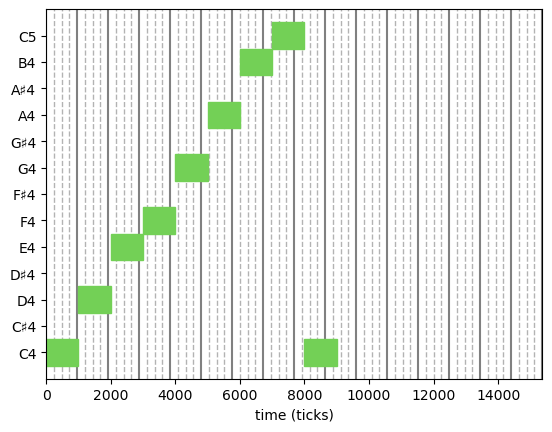

In [4]:
# println(event_stack)
grid = 0:1//4:1
noteplotter(notes; grid = grid)
# matplotlib.pyplot.close()
# x = range(0; stop=2*pi, length=1000); y = sin.(3 * x + 4 * cos.(2 * x));
# plot(x, y, color="red", linewidth=2.0, linestyle="--")
# title("A sinusoidally modulated sinusoid")
display(gcf())